In [2]:
%reload_ext autoreload
%autoreload 120
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

The original dataset is “The Instacart Online Grocery Shopping Dataset 2017”, Accessed from https://www.instacart.com/datasets/grocery-shopping-2017 on June 3, 2020

In [4]:
folder = 'instacart_2017_05_01'
os.listdir(folder)

['._aisles.csv',
 'order_products__train.csv',
 '._products.csv',
 'products.csv',
 '._order_products__train.csv',
 '._orders.csv',
 '._departments.csv',
 'aisles.csv',
 '._order_products__prior.csv',
 'order_products__prior.csv',
 'orders.csv',
 'departments.csv']

In [5]:
products = pd.read_csv(folder + '/' + 'products.csv').set_index('product_id'); products.head()

,product_name,aisle_id,department_id
product_id,,,
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
5,Green Chile Anytime Sauce,5,13


In [6]:
orders = pd.read_csv(folder + '/' + 'orders.csv')
h = pd.read_csv(folder + '/' + 'order_products__train.csv'); h.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


## Orders & products

In [8]:
unique_orders = h['order_id'].unique()
print(f'number of unique orders in the training file: {len(unique_orders)}')

number of unique orders in the training file: 131209


In [9]:
f = h['product_id'].value_counts()
idx = f.idxmax()
name = products.loc[idx, 'product_name']
print(f"Product bought the most is: [id = {idx}] {name}, in this sample, it has been bought {f.max()} times")

Product bought the most is: [id = 24852] Banana, in this sample, it has been bought 18726 times


Let's see the top 20 products ordered in this period 

In [10]:
for i, pr in enumerate(list(f[:20].index)):
    print(f"{i+1}) {pr} --> {products.loc[pr, 'product_name']}")

1) 24852 --> Banana
2) 13176 --> Bag of Organic Bananas
3) 21137 --> Organic Strawberries
4) 21903 --> Organic Baby Spinach
5) 47626 --> Large Lemon
6) 47766 --> Organic Avocado
7) 47209 --> Organic Hass Avocado
8) 16797 --> Strawberries
9) 26209 --> Limes
10) 27966 --> Organic Raspberries
11) 39275 --> Organic Blueberries
12) 27845 --> Organic Whole Milk
13) 30391 --> Organic Cucumber
14) 45007 --> Organic Zucchini
15) 22935 --> Organic Yellow Onion
16) 24964 --> Organic Garlic
17) 4920 --> Seedless Red Grapes
18) 46979 --> Asparagus
19) 40706 --> Organic Grape Tomatoes
20) 8518 --> Organic Red Onion


In [11]:
full_orders = pd.merge(h, orders[['order_id', 'order_dow']], how='left'); full_orders.head()

,order_id,product_id,add_to_cart_order,reordered,order_dow
0,1,49302,1,1,4
1,1,11109,2,1,4
2,1,10246,3,0,4
3,1,49683,4,0,4
4,1,43633,5,1,4


In [12]:
F = full_orders.groupby('order_dow')['product_id'].value_counts()\
                .groupby(level=0).head(1)
display(F)

order_dow  product_id
0          24852         4705
1          24852         2963
2          24852         2121
3          24852         2007
4          24852         1950
5          24852         2291
6          24852         2689
Name: product_id, dtype: int64

Banana are also the most ordered item per day of the week.

### first item added to the cart

In [13]:
frame = full_orders.groupby('order_id').head(1)
top_addedfirst = frame['product_id'].value_counts()[:20]

In [14]:
for i, pr in enumerate(list(top_addedfirst.index)):
    print(f"{i+1}) {pr} --> {products.loc[pr, 'product_name']}")

1) 24852 --> Banana
2) 13176 --> Bag of Organic Bananas
3) 27845 --> Organic Whole Milk
4) 47766 --> Organic Avocado
5) 21137 --> Organic Strawberries
6) 21903 --> Organic Baby Spinach
7) 47209 --> Organic Hass Avocado
8) 19660 --> Spring Water
9) 16797 --> Strawberries
10) 44632 --> Sparkling Water Grapefruit
11) 47626 --> Large Lemon
12) 27966 --> Organic Raspberries
13) 196 --> Soda
14) 12341 --> Hass Avocados
15) 43352 --> Raspberries
16) 11520 --> Large Alfresco Eggs
17) 49235 --> Organic Half & Half
18) 39275 --> Organic Blueberries
19) 37067 --> Organic Banana
20) 24838 --> Unsweetened Almondmilk


In [15]:
frame.groupby('order_dow')['product_id'].value_counts()\
        .groupby(level=0).head(1)

order_dow  product_id
0          24852         1175
1          24852          760
2          24852          485
3          24852          458
4          24852          504
5          24852          591
6          24852          632
Name: product_id, dtype: int64

Banana seem to be also the most popular first added item to the cart each day of the week.

## Distribution of items per cart/order

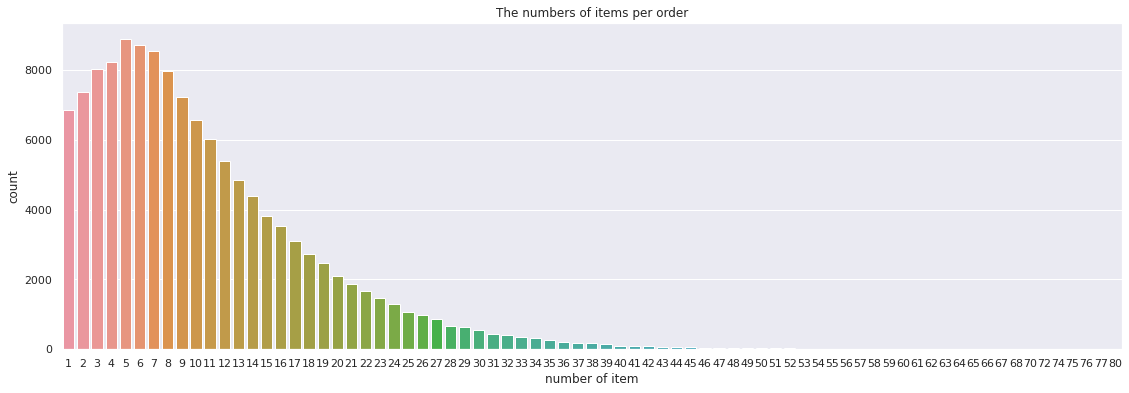

In [16]:
x = full_orders['order_id'].value_counts()
#sns.countplot(x='order_id', data=full_orders)
_ = plt.figure(figsize=(19,6))
sns.countplot(x)
plt.xlabel('number of item')
plt.title('The numbers of items per order')
plt.show()

In [17]:
x.describe()

count    131209.000000
mean         10.552759
std           7.932847
min           1.000000
25%           5.000000
50%           9.000000
75%          14.000000
max          80.000000
Name: order_id, dtype: float64

Right skewed distribution, describtion shows a median of 9 items per order while the mean is 10.55. We can wee one order of 80 items while 75% of the orders has less than 14 items

## Departments and aisle sales

In [18]:
#dx = full_orders.groupby('order_dow')['product_id'].value_counts().to_frame()
#dx.columns = ['count']
full_df = pd.merge(full_orders, products, how='left', left_index=True, right_index=True)
full_df.head()

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name,aisle_id,department_id
0,1,49302,1,1,4,NaN,NaN,NaN
1,1,11109,2,1,4,Chocolate Sandwich Cookies,61.0,19.0
2,1,10246,3,0,4,All-Seasons Salt,104.0,13.0
3,1,49683,4,0,4,Robust Golden Unsweetened Oolong Tea,94.0,7.0
4,1,43633,5,1,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1.0


In [19]:
departments = pd.read_csv(folder + '/' + 'departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
full_df = pd.merge(full_df, departments, how='left')

In [21]:
aisles = pd.read_csv(folder + '/' + 'aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [22]:
full_df = pd.merge(full_df, aisles, how='left')
full_df.head()

,order_id,product_id,add_to_cart_order,reordered,order_dow,product_name,aisle_id,department_id,department,aisle
0,1,49302,1,1,4,NaN,NaN,NaN,NaN,NaN
1,1,11109,2,1,4,Chocolate Sandwich Cookies,61.0,19.0,snacks,cookies cakes
2,1,10246,3,0,4,All-Seasons Salt,104.0,13.0,pantry,spices seasonings
3,1,49683,4,0,4,Robust Golden Unsweetened Oolong Tea,94.0,7.0,beverages,tea
4,1,43633,5,1,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38.0,1.0,frozen,frozen meals


In [23]:
full_df = full_df.dropna(subset=['aisle', 'product_name', 'department'])

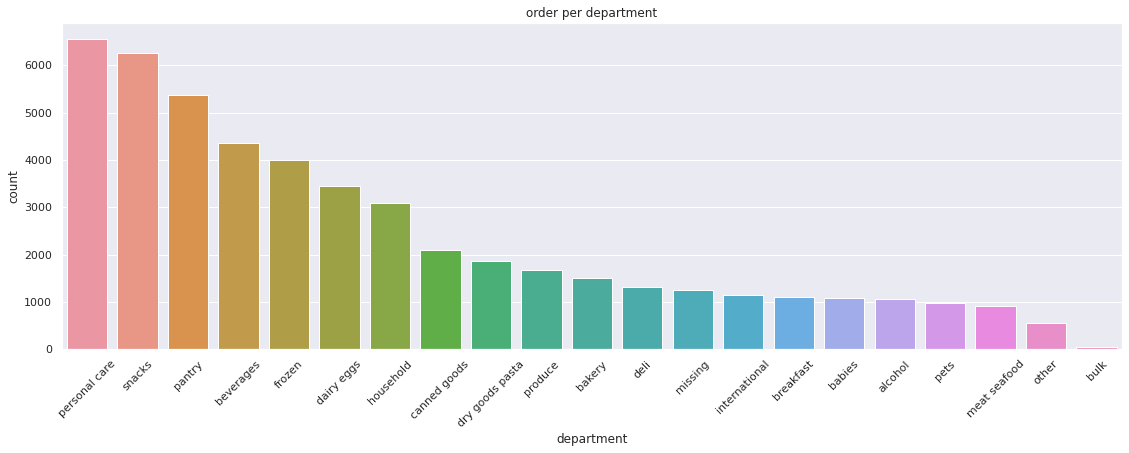

In [24]:
_ = plt.figure(figsize=(19, 6))
sns.countplot(full_df['department'], order=full_df.department.value_counts().iloc[:].index)
plt.xticks(rotation=45)
plt.title('order per department')
plt.show()

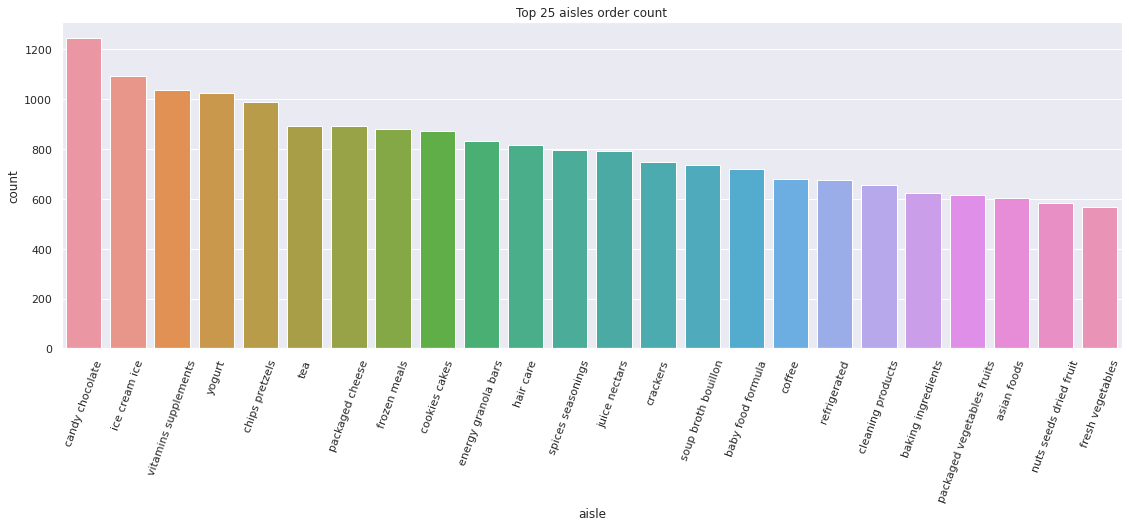

In [27]:
_ = plt.figure(figsize=(19, 6))
#index 0 is for missing aisle
sns.countplot(full_df['aisle'], order=full_df.aisle.value_counts().iloc[1:25].index) 
plt.xticks(rotation=70)
plt.title('Top 25 aisles order count')
plt.show()

Well there are missing aisles as we can see. However, looking at the department and aisles we can see some consistencies because usually products by the same department are usually grouped in the same aisle 

In terms of deparments, Personal care and snacks have most purchases followed by Panrty, beverages and frozen. 